#Extract Graphs for 2 time Period

**Read files and prepare Edge dataset**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
period_1 = 'JulSep2017'
period_2 = 'OctDec2017'

In [ ]:
t1_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/AprJun2016.csv", keep_default_na=False)
t2_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/JulSep2016.csv", keep_default_na=False)

t1_df.columns = ['Network','Label','Density','Centrality','Quadrant','TimeLabel','Country','NodeInternalList','EdgeInternalList','EdgeExternalList','NodeExternalList']
t2_df.columns = ['Network','Label','Density','Centrality','Quadrant','TimeLabel','Country','NodeInternalList','EdgeInternalList','EdgeExternalList','NodeExternalList']

In [ ]:
# t1_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/JulSep2016.csv", keep_default_na=False)
# t2_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/OktDes2016.csv", keep_default_na=False)
# t1_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/JulSep2016.csv')
# t2_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/OktDes2016.csv')

In [ ]:
t2_df.head()

,Network,Label,Density,Centrality,Quadrant,TimeLabel,Country,NodeInternalList,EdgeInternalList,EdgeExternalList,NodeExternalList
0,0,javascript,0.021036,0.0,2,JulSep2016,de,lucene#multithreading#perl#xslt#continuous-del...,"mysql#php#0.07""coldfusion#scripting-language#0...","hardware#javascript#0.00""compiler#scripting-la...",active-directory#togaf#data-management#vmware#...
1,1,database,0.038333,0.0,2,JulSep2016,de,sql#database#oracle#relational-database#,"relational-database#sql#0.02""database#relation...","jira#oracle#0.00"".net#database#0.00""database#h...",lucene#data-management#vmware#gulp#amazon-web-...
2,2,ipad,0.135000,0.0,1,JulSep2016,de,ipad#iphone#capybara#,"ipad#iphone#0.19""capybara#ipad#0.08""","data-mining#iphone#0.00""data-warehouse#iphone#...",software-engineering#scrum#data-warehouse#c++#...
3,3,nosql,0.051667,0.0,2,JulSep2016,de,nosql#mapreduce#mongodb#web-crawler#matlab#,"matlab#nosql#0.01""mapreduce#matlab#0.04""mapred...","data-mining#mapreduce#0.01""nosql#project-manag...",lucene#data-management#amazon-web-services#per...
4,4,data-mining,0.033571,0.0,2,JulSep2016,de,business-intelligence#data-warehouse#artificia...,"business-intelligence#data-warehouse#0.11""busi...","computer-science#data-mining#0.01""data-science...",active-directory#scipy#lucene#data-management#...


#Get the common nodes and edges between 2 clusters

In [ ]:
def getNodeList(c, df):
  c_nodes = list(df.query('Network == "'+ c + '"', inplace = False)["NodeInternalList"])[0]
  c_node_list = list(c_nodes.split('#'))
  # empty string removal
  c_node_list = [i for i in c_node_list if i] 
  return c_node_list

In [ ]:
def getCommonNodes(c1_node_list, c2_node_list):
  # get common elements
  if (set(c1_node_list)&set(c2_node_list)):
    a = list(set(c1_node_list)&set(c2_node_list))
    return len(a)
  else:
    return 0

In [ ]:
c1_nodes = getNodeList("0", t1_df)
c2_nodes = getNodeList("0", t2_df)
print(c1_nodes)
print(c2_nodes)
common_nodes_num = getCommonNodes(c1_nodes, c2_nodes)
print(common_nodes_num)

['lucene', 'sql', 'nosql', 'xml', 'complex-event-processing', 'json', 'apache-spark', 'mongodb', 'sqlite', 'javascript', 'junit', 'php', 'selenium', 'html', 'continuous-integration', 'delphi', 'soap', 'jira', 'git', 'postgis', 'mysql', 'postgresql', 'html5', 'elasticsearch', 'relational-database']
['lucene', 'multithreading', 'perl', 'xslt', 'continuous-delivery', 'angularjs', 'redis', 'xml', 'google-app-engine', 'openstack', 'json', 'lisp', 'nagios', 'laravel', 'nunit', 'javascript', 'coldfusion', 'nginx', 'php', 'yii', 'clojure', 'html', 'soap', 'zend-framework', 'postgis', 'websocket', 'rabbitmq', 'symfony', 'debian', 'xhtml', 'mysql', 'mahout', 'node.js', 'jquery', 'google-apps', 'postgresql', 'orchestration', 'html5', 'scripting-language', 'elasticsearch']
12


In [ ]:
def getEdgeList(c, df):
  c_edges = list(df.query('Network == "'+ c + '"', inplace = False)["EdgeInternalList"])[0] + list(df.query('Network == "'+ c + '"', inplace = False)["EdgeExternalList"])[0]
  c_edge_list = list(c_edges.split('"'))
  c_edge_list = [i for i in c_edge_list if i] 
  c_edge_final = []
  for item in c_edge_list:
    temp_l = list(item.split('#'))
    temp_l.pop(-1)
    c_edge_final.append(temp_l)
  if not any(c_edge_final):
    c_edge_final = []
  return c_edge_final

In [ ]:
def common_edges(c1_edge, c2_edge):
  # finding common edges
  common_edges = []
  for i in c1_edge:
    for j in c2_edge:
      i.sort()
      j.sort()
      if i == j:
        common_edges.append(i)
  # print(common_edges)
  return len(common_edges)

In [ ]:
c1_edges = getEdgeList("0", t1_df)
c2_edges = getEdgeList("0", t2_df)

print(c1_edges)
print(c2_edges)

common_edges_num = common_edges(c1_edges, c2_edges)
common_edges_num

[['javascript', 'php'], ['html', 'php'], ['php', 'sql'], ['json', 'sqlite'], ['json', 'xml'], ['postgis', 'postgresql'], ['sqlite', 'xml'], ['javascript', 'sql'], ['php', 'selenium'], ['html', 'sql'], ['postgis', 'sqlite'], ['postgresql', 'sql'], ['relational-database', 'sql'], ['html', 'javascript'], ['html5', 'sql'], ['postgresql', 'sqlite'], ['html', 'relational-database'], ['html5', 'javascript'], ['continuous-integration', 'nosql'], ['json', 'lucene'], ['selenium', 'soap'], ['mysql', 'selenium'], ['json', 'mysql'], ['git', 'mysql'], ['continuous-integration', 'elasticsearch'], ['mongodb', 'nosql'], ['mysql', 'php'], ['mongodb', 'mysql'], ['postgresql', 'selenium'], ['nosql', 'relational-database'], ['postgresql', 'soap'], ['elasticsearch', 'html'], ['json', 'mongodb'], ['mysql', 'soap'], ['elasticsearch', 'nosql'], ['elasticsearch', 'lucene'], ['javascript', 'soap'], ['javascript', 'xml'], ['mysql', 'postgresql'], ['mysql', 'nosql'], ['git', 'sql'], ['continuous-integration', 'mon

242

# Get Nodes and edge set of full graphs

In [ ]:
import itertools

In [ ]:
def getNodeListofGraph(graph):
  nodes = list(graph["NodeInternalList"])
  all_nodes = []
  for item in nodes:
    temp_arr = item.split('#')
    all_nodes.append(temp_arr)
  all_nodes = list(itertools.chain.from_iterable(all_nodes))
  all_nodes = [i for i in all_nodes if i]
  return all_nodes

In [ ]:
gt1_node_list = getNodeListofGraph(t1_df)
gt2_node_list = getNodeListofGraph(t2_df)
print(gt1_node_list)
print(gt2_node_list)

['lucene', 'sql', 'nosql', 'xml', 'complex-event-processing', 'json', 'apache-spark', 'mongodb', 'sqlite', 'javascript', 'junit', 'php', 'selenium', 'html', 'continuous-integration', 'delphi', 'soap', 'jira', 'git', 'postgis', 'mysql', 'postgresql', 'html5', 'elasticsearch', 'relational-database', 'vmware', 'perl', 'ansible', 'multithreading', 'angularjs', 'hardware', 'nagios', 'asp.net', 'monitoring', 'websphere', 'jquery', 'model-view-controller', 'groovy', 'labview', 'scripting-language', 'business-objects', 'business-intelligence', 'data-warehouse', 'sybase', 'data-mining', '.net', 'xamarin', '.net-framework', 'refactoring', 'unit-testing', 'ios', 'flask', 'symfony', 'node.js', 'nginx', 'zend-framework', 'magento', 'linux', 'gnu', 'unix', 'embedded-linux']
['lucene', 'multithreading', 'perl', 'xslt', 'continuous-delivery', 'angularjs', 'redis', 'xml', 'google-app-engine', 'openstack', 'json', 'lisp', 'nagios', 'laravel', 'nunit', 'javascript', 'coldfusion', 'nginx', 'php', 'yii', '

In [ ]:
getCommonNodes(gt1_node_list, gt2_node_list)

35

In [ ]:
def getEdgeListofGraph(graph):
  edges = list(graph["EdgeInternalList"])
  edges = [i for i in edges if i]
  all_edges = []
  c_edges = edges[0]
  for c_edges in edges:
    c_edge_list = list(c_edges.split('"'))
    c_edge_list = [i for i in c_edge_list if i] 
    for item in c_edge_list:
      temp_l = list(item.split('#'))
      temp_l.pop(-1)
      all_edges.append(temp_l)
    if not any(all_edges):
      all_edges = []
  return all_edges

In [ ]:
gt1_edge_list = getEdgeListofGraph(t1_df)
gt2_edge_list = getEdgeListofGraph(t2_df)
print(gt1_edge_list)
print(gt2_edge_list)

[['javascript', 'php'], ['html', 'php'], ['php', 'sql'], ['json', 'sqlite'], ['json', 'xml'], ['postgis', 'postgresql'], ['sqlite', 'xml'], ['javascript', 'sql'], ['php', 'selenium'], ['html', 'sql'], ['postgis', 'sqlite'], ['postgresql', 'sql'], ['relational-database', 'sql'], ['html', 'javascript'], ['html5', 'sql'], ['postgresql', 'sqlite'], ['html', 'relational-database'], ['html5', 'javascript'], ['continuous-integration', 'nosql'], ['json', 'lucene'], ['selenium', 'soap'], ['mysql', 'selenium'], ['json', 'mysql'], ['git', 'mysql'], ['continuous-integration', 'elasticsearch'], ['mongodb', 'nosql'], ['mysql', 'php'], ['mongodb', 'mysql'], ['postgresql', 'selenium'], ['nosql', 'relational-database'], ['postgresql', 'soap'], ['elasticsearch', 'html'], ['json', 'mongodb'], ['mysql', 'soap'], ['elasticsearch', 'nosql'], ['elasticsearch', 'lucene'], ['javascript', 'soap'], ['javascript', 'xml'], ['mysql', 'postgresql'], ['mysql', 'nosql'], ['git', 'sql'], ['continuous-integration', 'mon

In [ ]:
common_edges(gt1_edge_list, gt2_edge_list)

37

**Get number of links between 2 clusters**

In [ ]:
# Filter out No-cluster items from the t1_df and t2_df
t1_df_filtered = t1_df.loc[t1_df['EdgeInternalList'] != '']
t2_df_filtered = t2_df.loc[t2_df['EdgeInternalList'] != '']

In [ ]:
def getLinkNum(c1, c2):
  c1_nodes = getNodeList(c1, t1_df_filtered)
  c2_nodes = getNodeList(c2, t2_df_filtered)
  common_nodes_num = getCommonNodes(c1_nodes, c2_nodes)

  c1_edges = getEdgeList(c1, t1_df_filtered)
  c2_edges = getEdgeList(c2, t2_df_filtered)
  common_edges_num = common_edges(c1_edges, c2_edges)

  links_num = common_nodes_num + 2*common_edges_num
  return links_num

In [ ]:
links_num = getLinkNum("0", "0")
links_num

496

**Get links between Graph and a cluster**

In [ ]:
def getLinksBWClusterAndGraph(c_nodes, g_nodes, c_edges, g_edges):
  common_nodes_num = getCommonNodes(c_nodes, g_nodes)
  common_edges_num = common_edges(c_edges, g_edges)

  links_num = common_nodes_num + 2*common_edges_num
  return links_num

In [ ]:
c_nodes = getNodeList("4", t1_df_filtered)
g_nodes = getNodeListofGraph(t2_df_filtered)

c_edges = getEdgeList("4", t1_df_filtered)
g_edges = getEdgeListofGraph(t2_df_filtered)
getLinksBWClusterAndGraph(c_nodes, g_nodes, c_edges, g_edges)

0

# Prepare Link Counting Matrix between two Time frame Graphs

**<Mat(t-1, t)>**

In [ ]:
t1_cluser_ids = list(t1_df_filtered["Network"])
t2_cluser_ids = list(t2_df_filtered["Network"])

In [ ]:
list_outer = []
for i in t1_cluser_ids:
    list_inner = []
    for j in t2_cluser_ids:
      links_num = getLinkNum(str(i), str(j))
      list_inner.append(links_num)
    list_outer.append(list_inner)
mat_t1_t2 = np.array(list_outer, np.int64)

In [ ]:
mat_t1_t2

array([[496, 192,   0,  90,  74,   0,   9,  64,   4,   0,  14],
       [ 57,   2,   0,   0,   8,   0,   0,   0,   0,   0,   0],
       [135,  28,   0,   8,  12,   0,   7,  11,   0,   0,   0],
       [ 38,  28,   0,  12, 287,   0,   0,   6,   0,   0,   4],
       [ 26,  14,   0,   0,  18,   0,   0,   2,   0,   0,   2],
       [ 22,   2,   0,   2,   0,   0,   0,   0,   0,   0,   0],
       [ 22,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0],
       [ 30,   6,   0,   4,   6,   0,   0,   2,   0,   0,   2]])

**<Arr(t-1)>**

From c(t-1) to G(t)

In [ ]:
arr_t1_list_outer = []
g_nodes = getNodeListofGraph(t2_df)
g_edges = getEdgeListofGraph(t2_df)
for i in t1_cluser_ids:
  c_nodes = getNodeList(str(i), t1_df)
  c_edges = getEdgeList(str(i), t1_df)

  temp_links_num = getLinksBWClusterAndGraph(c_nodes, g_nodes, c_edges, g_edges)
  arr_t1_list_outer.append(temp_links_num)

arr_t1 = np.array(arr_t1_list_outer, np.int64)
arr_t1 = arr_t1.reshape((arr_t1.shape[0], 1))

In [ ]:
arr_t1

array([[155],
       [ 15],
       [ 43],
       [ 23],
       [  0],
       [ 12],
       [ 15],
       [  0]])

**<Arr(t)>**

From C(t) to G(t-1)

In [ ]:
arr_t2_list_outer = []
g_nodes = getNodeListofGraph(t1_df)
g_edges = getEdgeListofGraph(t1_df)
for i in t2_cluser_ids:
  c_nodes = getNodeList(str(i), t2_df)
  c_edges = getEdgeList(str(i), t2_df)

  temp_links_num = getLinksBWClusterAndGraph(c_nodes, g_nodes, c_edges, g_edges)
  arr_t2_list_outer.append(temp_links_num)

arr_t2 = np.array(arr_t2_list_outer, np.int64)
arr_t2 = arr_t2.reshape((arr_t2.shape[0], 1))
arr_t2 = arr_t2.transpose()

In [ ]:
arr_t2

array([[166,  38,   0,  36,  19,   0,   6,  27,   1,   0,   0]])

**<LC(total)>**

number of links between G(t-1) and G(t)

In [ ]:
g1_nodes = getNodeListofGraph(t1_df)
g2_nodes = getNodeListofGraph(t2_df)

g1_edges = getEdgeListofGraph(t1_df)
g2_edges = getEdgeListofGraph(t2_df)

graphs_common_nodes_num = getCommonNodes(g1_nodes, g2_nodes)
graphs_common_edges_num = common_edges(g1_edges, g2_edges)

lc_total = graphs_common_nodes_num + 2*graphs_common_edges_num
print(lc_total)

109


In [ ]:
# mat_t1_t2 = np.array([[14, 2, 0], [0,1,14]])
# arr_t1 = np.array([22, 27])
# arr_t1 = arr_t1.reshape((arr_t1.shape[0], 1))
# arr_t2 = np.array([14, 12, 19])
# arr_t2 = arr_t2.reshape((arr_t2.shape[0], 1))
# arr_t2 = arr_t2.transpose()
# lc_total = 58

#Mututal Information can be calculated as follows

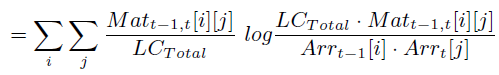

In [ ]:
mat_t1_t2.shape[1]

11

In [ ]:
def calculateMI(mat_t1_t2, arr_t1, arr_t2, lc_total):
  mi = 0
  outer_loop = mat_t1_t2.shape[0]
  inner_loop = mat_t1_t2.shape[1]
  for i in range(outer_loop):
    for j in range(inner_loop):
      left_part = (mat_t1_t2[i][j] / lc_total)
      if left_part != 0 and arr_t1[i][0] != 0 and arr_t2[0][j] != 0:
        right_part = np.log((lc_total*mat_t1_t2[i][j])/(arr_t1[i][0]*arr_t2[0][j]))
      else: 
        right_part = 0
      mi += left_part * right_part
  return mi

In [ ]:
mat_t1_t2

array([[496, 192,   0,  90,  74,   0,   9,  64,   4,   0,  14],
       [ 57,   2,   0,   0,   8,   0,   0,   0,   0,   0,   0],
       [135,  28,   0,   8,  12,   0,   7,  11,   0,   0,   0],
       [ 38,  28,   0,  12, 287,   0,   0,   6,   0,   0,   4],
       [ 26,  14,   0,   0,  18,   0,   0,   2,   0,   0,   2],
       [ 22,   2,   0,   2,   0,   0,   0,   0,   0,   0,   0],
       [ 22,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0],
       [ 30,   6,   0,   4,   6,   0,   0,   2,   0,   0,   2]])

In [ ]:
gain_prior = calculateMI(mat_t1_t2, arr_t1, arr_t2, lc_total)

In [ ]:
# matrix_t1_t2 = np.array([[14, 2, 0],[0, 1, 14]])
# matrix_t1_t2 = np.array([[14, 0, 0],[0, 0, 14]])
# array_t1 = np.array([[22], [27]])
# array_t2 = np.array([[14, 12, 19]])
# lc_tot = 58
# calculateMI(matrix_t1_t2, array_t1, array_t2, lc_tot)

# Heuristic Algorithm to Purify <Mat (t-1, t)> 

Input: <Mat (t-1, t)>, <Arr(t-1)>, <Arr(t)>, LC_total

Output: Purified form of <Mat (t-1, t)>

In [ ]:
def unitMI(mat_t1_t2, i, j):
  left_part = (mat_t1_t2[i][j] / lc_total)
  if left_part != 0 and arr_t1[i][0] != 0 and arr_t2[0][j] != 0:
    right_part = np.log((lc_total*mat_t1_t2[i][j])/(arr_t1[i][0]*arr_t2[0][j]))
  else: 
    right_part = 0
  gain = left_part * right_part
  return gain

In [ ]:
#prepare UnitMI Matrix
unitMI_mat = np.zeros((mat_t1_t2.shape[0], mat_t1_t2.shape[1]))
for i in range(mat_t1_t2.shape[0]):
  for j in range(mat_t1_t2.shape[1]):
    unitMI_mat[i][j] = "{:.2f}".format(unitMI(mat_t1_t2, i, j))

**Max Heap**

In [ ]:
from heapq import heappop, heappush, heapify 
  
# Creating empty heap 
heap = [] 
heapify(heap) 
  
# Adding items to the heap using heappush 
# function by multiplying them with -1 
# push unitMI matrix into
for i in range(unitMI_mat.shape[0]):
  for j in range(unitMI_mat.shape[1]):
    heappush(heap, -1 *unitMI_mat[i][j])

In [ ]:
while heap != []:
  element = heappop(heap)
  element = element * -1
  indices = np.argwhere(unitMI_mat == element)
  p,q = indices[0]
  print(element)
  print(p, q)
  print("=====")
  # calculate delta_mi
  first_sum = 0
  second_sum = 0
  for k in range(unitMI_mat.shape[0]):
    first_sum += unitMI_mat[k][q]
  
  for k in range(unitMI_mat.shape[1]):
    second_sum += unitMI_mat[p][k]
  
  delta_mi = -first_sum - second_sum + 4*unitMI_mat[p][q]

  if delta_mi > 0:       
		# Delete all (UnitMI [i] [q], i, q) from Hmax
    for k in range(unitMI_mat.shape[0]):
      ele = unitMI_mat[k][q]
      ele = ele*-1
      if ele in heap:
        index = heap.index(ele)
        heap[index] = heap[-1]
        heap.pop()
        heapify(heap)

    # Delete all (UnitMI [p] [j], p, j) from Hmax
    for k in range(unitMI_mat.shape[1]):
      ele = unitMI_mat[p][k]
      ele = ele*-1
      if ele in heap:
        index = heap.index(ele)
        heap[index] = heap[-1]
        heap.pop()
        heapify(heap)

    # Set all <Mat(t-1, t)> [p] [j] and all <Mat(t-1, t)> [i] [q] as zero value except for <Mat(t-1, t)> [p][q]
    for k in range(mat_t1_t2.shape[0]):
      if k != p:
        mat_t1_t2[k][q] = 0
        unitMI_mat[k][q] = 0

    for k in range(mat_t1_t2.shape[1]):
      if k != q:
        mat_t1_t2[p][k] = 0
        unitMI_mat[p][k] = 0
    print(mat_t1_t2)
    print("===============")
    print("                ")
  else:
    break


11.25
3 4
=====
[[496 192   0  90   0   0   9  64   4   0  14]
 [ 57   2   0   0   0   0   0   0   0   0   0]
 [135  28   0   8   0   0   7  11   0   0   0]
 [  0   0   0   0 287   0   0   0   0   0   0]
 [ 26  14   0   0   0   0   0   2   0   0   2]
 [ 22   2   0   2   0   0   0   0   0   0   0]
 [ 22   0   0   0   0   0   0   0   5   0   0]
 [ 30   6   0   4   0   0   0   2   0   0   2]]
                
3.38
0 0
=====
[[496   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0]
 [  0  28   0   8   0   0   7  11   0   0   0]
 [  0   0   0   0 287   0   0   0   0   0   0]
 [  0  14   0   0   0   0   0   2   0   0   2]
 [  0   2   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5   0   0]
 [  0   6   0   4   0   0   0   2   0   0   2]]
                
0.16
2 1
=====
[[496   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0  28   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 287   0

#Store Mapping Result

In [ ]:
# result = []
# for i in range(mat_t1_t2.shape[0]):
#   for j in range(mat_t1_t2.shape[1]):
#     if mat_t1_t2[i][j] != 0:
#       result.append([period_1, period_2, i, j])
# result_df = pd.DataFrame(result, columns=['period_a', 'period_b', 'from_id', 'to_id'])
# result_df.shape

In [ ]:
# prev_result = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/mapping.csv')
# full_result = pd.concat([prev_result, result_df], ignore_index=True)
# full_result.shape

In [ ]:
# full_result.to_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/mapping.csv', index=False)

In [ ]:
gain_post = calculateMI(mat_t1_t2, arr_t1, arr_t2, lc_total)
print(gain_prior)
print(gain_post)

**Appending all clusters in one file**

In [ ]:
# files_arr = ['JanMar2016', 'AprJun2016', 'JulSep2016', 'OktDes2016', 'JanMar2017', 'AprJun2017', 'JulSep2017', 'OctDec2017']
# master_df = pd.DataFrame(columns=['Network_id', 'TimeLabel', 'Label', 'Density', 'Centrality', 'Cluster'])
# for file_name in files_arr:
#   file_name = '/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/' + file_name + '.csv'
#   tab_df = pd.read_csv(file_name)
#   tab_df = tab_df[['Unnamed: 0', 'Time_Label', 'Label', 'Density', 'Centrality', 'Node_Internal']]
#   tab_df.columns = ['Network_id', 'TimeLabel', 'Label', 'Density', 'Centrality', 'Cluster']
#   master_df = pd.concat([master_df, tab_df])

In [ ]:
# master_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/clusters_details.csv', index=False)

#Create Series of Mapped Clusters

In [ ]:
import pandas as pd

In [ ]:
mapped_list = [
                [0,0,1,3,3,0,4,3],
                [4,1,'?','?','?','?','?','?'],
                [6,2,6,4,'?','?','?','?'],
                [3,4,5,5,'?','?','?','?'],
                [1,5,'?','?','?','?','?','?'],
                [2,6,0,8,0,3,1,9],
                ['?',3,4,6,'?','?','?','?'],
                ['?','?',2,2,'?','?','?','?'],
                ['?','?','?',1,2,2,7,11],
                ['?','?','?','?',5,4,2,4],
                ['?','?','?','?','?','?',0,0],
                ['?','?','?','?','?','?',6,1]
]
cluster_series_df = pd.DataFrame(mapped_list, columns=['JanMar2016', 'AprJun2016', 'JulSep2016', 'OktDes2016', 'JanMar2017', 'AprJun2017', 'JulSep2017', 'OctDec2017'])
cluster_series_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/knowledge_graph_results/series/joint_ic_series.csv', index=False)

In [ ]:
# Show Cluster Groupss
num_series_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/3_rules_series.csv')
cluster_detail_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/clusters_details.csv')

# Creating a new df to merge number series and cluster structure df
time_frames = ['JanMar2016', 'AprJun2016', 'JulSep2016', 'OktDes2016', 'JanMar2017', 'AprJun2017', 'JulSep2017', 'OctDec2017']
result_list = []
for index, rows in num_series_df.iterrows():
  temp_list = []
  for i in range(len(rows)):
    cluster_id = rows[i]
    time_frame_id = time_frames[i]
    if cluster_id != '?':
      #fetch cluster Structure
      cluster_data = cluster_detail_df.query('Network_id == ' + str(cluster_id) + ' and TimeLabel == "' + str(time_frame_id) + '"', inplace=False)
      cluster_structure = cluster_data["Cluster"].tolist()[0]
      cluster_cen = cluster_data["Centrality"].tolist()[0]
      cluster_den = cluster_data["Density"].tolist()[0]
      cluster_label = cluster_data["Label"].tolist()[0]
      cluster_info = str(cluster_structure) + "|" + str(cluster_cen) + "|" + str(cluster_den) + "|" + str(cluster_label)
      temp_list.append(cluster_info)
    else:
      temp_list.append('?')
  result_list.append(temp_list)
  
result_df = pd.DataFrame(result_list, columns=['JanMar2016', 'AprJun2016', 'JulSep2016', 'OktDes2016', 'JanMar2017', 'AprJun2017', 'JulSep2017', 'OctDec2017'])
result_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/3_rules_series_with_clusters.csv', index=False)

In [ ]:
series_with_clusters = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/series_with_clusters.csv')
series_with_clusters.head()

,JanMar2016,AprJun2016,JulSep2016,OktDes2016,JanMar2017,AprJun2017,JulSep2017,OctDec2017
0,data-management#business-intelligence#software...,business-objects#business-intelligence#data-wa...,business-intelligence#data-warehouse#artificia...,business-intelligence#data-warehouse#machine-l...,big-data#architect#business-intelligence#data-...,?,?,?
1,angularjs#json#laravel#javascript#nginx#php#me...,lucene#sql#nosql#xml#complex-event-processing#...,lucene#multithreading#perl#xslt#continuous-del...,redis#xslt#angularjs#nosql#xml#mapreduce#json#...,html#user-interface#user-experience#|0.0|0.666...,user-experience#nosql#user-interface#hardware#...,cuda#hardware#opencl#|0.0|0.31|cuda,opengl#opencl#opencv#|0.0|0.25|opencl
2,.net#.net-framework#asp.net#|0.173205080756887...,.net#xamarin#.net-framework#refactoring#unit-t...,jira#websphere#git#version-control#|0.0|0.0525...,version-control#git#mercurial#|0.0|0.036666666...,.net#perl#nosql#groovy#.net-framework#selenium...,git#ansible#elasticsearch#monitoring#version-c...,nagios#monitoring#linux-kernel#nginx#lxc#|0.1|...,firewall#nagios#web-crawler#nginx#lxc#|0.0|0.1...
3,redis#mongodb#microservices#data-warehouse#pos...,linux#gnu#unix#embedded-linux#|0.0|0.116666666...,user-interface#user-experience#qnx#|0.0|0.04|u...,?,?,?,?,?
4,mapreduce#nosql#nagios#monitoring#pig#aerospik...,multithreading#angularjs#hardware#nagios#asp.n...,sql#database#oracle#relational-database#|0.0|0...,sql#database#oracle#relational-database#|0.0|0...,oracle#mysql#database#|0.31622776601683794|0.2...,mysql#angularjs#oracle#database#json#php#xml#s...,html#javascript#html5#angularjs#|0.0|0.1250000...,html#struts#semantic-web#typescript#model-view...


In [ ]:
# # ['JanMar2016', 'AprJun2016', 'JulSep2016', 'OktDes2016', 'JanMar2017', 'AprJun2017', 'JulSep2017', 'OctDec2017']
# cluster_map_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/mapping.csv')
# period_list = ['JanMar2016', 'AprJun2016', 'JulSep2016', 'OktDes2016', 'JanMar2017', 'AprJun2017', 'JulSep2017', 'OctDec2017']
# cluster_series_df = pd.DataFrame(columns=['JanMar2016', 'AprJun2016', 'JulSep2016', 'OktDes2016', 'JanMar2017', 'AprJun2017', 'JulSep2017', 'OctDec2017'])
# for index, rows in cluster_map_df.iterrows():
#   # check if a particular row needs to be processed or is it already processed in another series
#   check_row = cluster_series_df.query(rows["period_a"] + ' == ' + str(rows["from_id"]) + ' and ' + rows["period_b"] + ' == ' + str(rows["to_id"]), inplace=False).shape[0]
#   if check_row == 0:
#     new_row = {'JanMar2016':'-', 'AprJun2016':'-', 'JulSep2016':'-', 'OktDes2016':'-', 'JanMar2017':'-', 'AprJun2017':'-', 'JulSep2017':'-', 'OctDec2017':'-'}
#     temp_period_list = period_list.copy()
#     # added first mapping 
#     new_row[rows["period_a"]] = rows['from_id']
#     new_row[rows["period_b"]] = rows['to_id']
#     # removed processed element from the list
#     temp_period_list.remove(rows["period_a"])
#     temp_period_list.remove(rows["period_b"])
#     from_id = str(rows['to_id'])
#     period_a = rows["period_b"]
#     period_b = temp_period_list[0]

#     while temp_period_list:
#       r = cluster_map_df.query('period_a == "' + str(period_a) + '" and period_b =="' + str(period_b) + '" and from_id ==' + str(from_id) + '', inplace = False)
#       if r.shape[0] == 1:
#         new_row[period_b] = r['to_id'].tolist()[0]
#         from_id = r['to_id'].tolist()[0]
#         period_a = period_b
#         temp_period_list.remove(period_a)
#         if temp_period_list:
#           period_b = temp_period_list[0]
#         else:
#           break;
#       else:
#         break;
#     cluster_series_df = cluster_series_df.append(new_row, ignore_index=True)
# # new_row = {'name':'Geo', 'physics':87, 'chemistry':92, 'algebra':97}
# # df_marks = df_marks.append(new_row, ignore_index=True)

In [ ]:
# cluster_series_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/series.csv', index=False)

#Map Knowledge Graph Results

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# files_path = "/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/knowledge_graph_results/raw/"
# file_name = "Q1_Q2_2016.txt"

In [ ]:
def transformLineToList(line, cost_scheme):
  line = line.strip()
  temp_list = []
  if line.startswith(cost_scheme):
    line = line.replace(cost_scheme + ' [', '').replace(']', '')
    line_arr = line.split(',')
    for item in line_arr:
      item = item.strip()
      temp_list.append(float("{:.2f}".format(float(item))))
  return temp_list

In [ ]:
def filterMappedDF(df):
  frames = []
  to_ids = list(set(df["to_id"].tolist()))
  for id in to_ids:
    min_weight_df = df.query("to_id == " + str(id))
    min_weight_rows = min_weight_df[min_weight_df.weight == min_weight_df.weight.min()]
    frames.append(min_weight_rows)
  result = pd.concat(frames)
  return result

In [ ]:
def matrixToDf(matrix, t1, t2):
  full_result = []
  for i in range (0, len(matrix)):
    a = matrix[i]
    to_index = a.index(min(a))
    weight =  min(a)
    temp_l = [t1, t2, i, to_index, weight]
    full_result.append(temp_l)

  df = pd.DataFrame(full_result, columns=['period_a',	'period_b',	'from_id',	'to_id', 'weight'])
  df = filterMappedDF(df)
  return df

In [ ]:
def convertFileToDF(file_name, t1, t2):
  files_path = "/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/knowledge_graph_results/raw/"
  f = open(files_path+file_name, "r")
  joint_ic_matrix = []
  ic_pmi_matrix = []
  comb_ic_matrix = []
  for line in f:
    line = line.strip()
    temp_list = []
    if line.startswith('JointIC'):
      temp_list = transformLineToList(line, 'JointIC')
      joint_ic_matrix.append(temp_list)
    elif line.startswith('IC PMI'):
      temp_list = transformLineToList(line, 'IC PMI')
      ic_pmi_matrix.append(temp_list)
    elif line.startswith('CombIC'):
      temp_list = transformLineToList(line, 'CombIC')
      comb_ic_matrix.append(temp_list)
  
  joint_ic_df = matrixToDf(joint_ic_matrix, t1, t2)
  ic_pmi_df = matrixToDf(ic_pmi_matrix, t1, t2)
  comb_ic_df = matrixToDf(comb_ic_matrix, t1, t2)
  return joint_ic_df, ic_pmi_df, comb_ic_df
  # return joint_ic_matrix, ic_pmi_matrix, comb_ic_matrix

In [ ]:
from os import listdir
from os.path import isfile, join
files_path = "/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/knowledge_graph_results/raw/"
all_files = [f for f in listdir(files_path) if isfile(join(files_path, f))]

['Q1_Q2_2017.txt',
 'Q2_Q3_2017.txt',
 'Q1_Q2_2016.txt',
 'Q2_Q3_2016.txt',
 'Q3_Q4_2016.txt',
 'Q42016_Q1_2017.txt',
 'Q3_Q4_2017.txt']

In [ ]:
joint_ic_df1, ic_pmi_df1, comb_ic_df1 = convertFileToDF('Q1_Q2_2016.txt', "JanMar2016", "AprJun2016")
joint_ic_df2, ic_pmi_df2, comb_ic_df2 = convertFileToDF('Q2_Q3_2016.txt', "AprJun2016", "JulSep2016")
joint_ic_df3, ic_pmi_df3, comb_ic_df3 = convertFileToDF('Q3_Q4_2016.txt', "JulSep2016", "OktDes2016")
joint_ic_df4, ic_pmi_df4, comb_ic_df4 = convertFileToDF('Q42016_Q1_2017.txt', "OktDes2016", "JanMar2017")
joint_ic_df5, ic_pmi_df5, comb_ic_df5 = convertFileToDF('Q1_Q2_2017.txt', "JanMar2017", "AprJun2017")
joint_ic_df6, ic_pmi_df6, comb_ic_df6 = convertFileToDF('Q2_Q3_2017.txt', "AprJun2017", "JulSep2017")
joint_ic_df7, ic_pmi_df7, comb_ic_df7 = convertFileToDF('Q3_Q4_2017.txt', "JulSep2017", "OctDec2017")

In [ ]:
joint_ic_frames = [joint_ic_df1, joint_ic_df2, joint_ic_df3, joint_ic_df4, joint_ic_df5, joint_ic_df6, joint_ic_df7]
joint_ic_df = pd.concat(joint_ic_frames)

ic_pmi_frames = [ic_pmi_df1, ic_pmi_df2, ic_pmi_df3, ic_pmi_df4, ic_pmi_df5, ic_pmi_df6, ic_pmi_df7]
ic_pmi_df = pd.concat(ic_pmi_frames)

comb_ic_frames = [comb_ic_df1, comb_ic_df2, comb_ic_df3, comb_ic_df4, comb_ic_df5, comb_ic_df6, comb_ic_df7]
comb_ic_df = pd.concat(comb_ic_frames)

In [ ]:
joint_ic_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/knowledge_graph_results/joint_ic_mapping.csv", index=False)
ic_pmi_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/knowledge_graph_results/ic_pmi_mapping.csv", index=False)
comb_ic_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/knowledge_graph_results/comb_ic_mapping.csv", index=False)

#Time Series Prediction

In [ ]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
particle_series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/3_rules_series_with_clusters.csv')
# particle_series.head()

#### Evaluate Moving average Model

In [ ]:
import statistics
def getQuadrantsList(cen_series, den_series):
  quad_list = []
  centrailty_median = statistics.median(cen_series)
  density_median = statistics.median(den_series)

  for i in range(0, len(cen_series)):
    quadrant = getQuadrant(cen_series[i], den_series[i], centrailty_median, density_median)
    quad_list.append(quadrant)
  return quad_list

def getQuadrant(cen, den, centrailty_median, density_median):
  if den >= density_median and cen >= centrailty_median:
      quadrant = 1
  elif den <= density_median and cen >= centrailty_median:
    quadrant = 2
  elif den >= density_median and cen <= centrailty_median:
    quadrant = 3
  elif den <= density_median and cen <= centrailty_median:
    quadrant = 4
  else:
    quadrant = 1
  return quadrant

In [ ]:
def evaluate_series(cen_series, den_series, smooth_lvl):
  if len(cen_series) < 3:
    return [], []
  else:
    cen_median = statistics.median(cen_series)
    den_median = statistics.median(den_series)
    quad_list = getQuadrantsList(cen_series, den_series)
    quad_yhat_list = []

    cen_yhat, den_yhat = moving_average_prediction(cen_series, den_series, 2)
    # cen_yhat, den_yhat = SES_prediction(cen_series, den_series, smooth_lvl)
    # cen_yhat, den_yhat =  holt_prediction(cen_series, den_series)
    for i in range(0, len(cen_yhat)):
      quad_yhat_temp = getQuadrant(cen_yhat[i], den_yhat[i], cen_median, den_median)
      quad_yhat_list.append(quad_yhat_temp)
    quad_list = quad_list[2:]

    # j = 3
    # while True:
    #   temp_cen_srs = cen_series[:j]
    #   temp_den_srs = den_series[:j]
      
    #   cen_yhat, den_yhat = moving_average_prediction(temp_cen_srs, temp_den_srs, 2)
    #   # cen_yhat, den_yhat = predict_Centrality_Density(temp_cen_srs, temp_den_srs)
    #   quad_yhat = getQuadrant(cen_yhat, den_yhat, cen_median, den_median)
    #   quad_yhat_list.append(quad_yhat)
    #   j = j + 1
    #   if j == len(cen_series):
    #     break;
    # quad_list = quad_list[3:]
    return quad_list, quad_yhat_list

In [ ]:
cen_srs = [0.0, 0.0, 0.0, 0.0, 0.31622776601683794, 0.2645751311064591, 0.0, 0.0] 
den_srs = [0.5, 0.06876288659793811, 0.03833333333333334, 0.043333333333333335, 0.22, 0.1486206896551724, 0.12500000000000006, 0.0491304347826087]
evaluate_series(cen_srs, den_srs, 0.5)

NameError: ignored

Moving Average result


([2, 1, 1, 1, 2], [1, 1, 1, 1, 1])

([2, 1, 1, 2, 2], [1, 2, 1, 1, 1])

([2, 1], [1, 2])

([4, 1, 1, 2, 4], [3, 3, 3, 1, 1])

([2, 1, 2, 1, 2], [1, 2, 2, 1, 1])

([1, 1, 4], [1, 1, 1])

([1, 1, 4], [2, 1, 1])

([4], [1])

[2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 4, 1, 1, 2, 4, 2, 1, 2, 1, 2, 1, 1, 4, 1, 1, 4, 4]


[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 3, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1]

In [ ]:
import numpy as np

def moving_average_prediction(cen_series, den_series, window):
  cen_df = pd.DataFrame(cen_series, columns=['cen'])
  cen_rolling_series = cen_df.rolling(window=window)
  cen_rolling_mean = cen_rolling_series.mean()
  cen_yhat = cen_rolling_mean[2:]['cen'].tolist()
  
  den_df = pd.DataFrame(den_series, columns=['den'])
  den_rolling_series = den_df.rolling(window=window)
  den_rolling_mean = den_rolling_series.mean()
  den_yhat = den_rolling_mean[2:]['den'].tolist()
  return cen_yhat, den_yhat

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, Holt, SimpleExpSmoothing

def SES_prediction(cen_series, den_series, smoothing_lvl):
  cen_df = pd.DataFrame(cen_series, columns=['cen'])
  cen_fit = SimpleExpSmoothing(cen_df).fit(smoothing_level = smoothing_lvl, optimized=False)
  cen_yhat = cen_fit.fittedvalues.tolist()
  cen_yhat = cen_yhat[2:]

  den_df = pd.DataFrame(den_series, columns=['den'])
  den_fit = SimpleExpSmoothing(den_df).fit(smoothing_level = smoothing_lvl, optimized=False)
  den_yhat = den_fit.fittedvalues.tolist()
  den_yhat = den_yhat[2:]
  return cen_yhat, den_yhat

def holt_prediction(cen_series, den_series):
  cen_df = pd.DataFrame(cen_series, columns=['cen'])
  cen_fit = Holt(cen_df, exponential=False).fit()
  cen_yhat = cen_fit.fittedvalues.tolist()
  cen_yhat = cen_yhat[2:]

  den_df = pd.DataFrame(den_series, columns=['den'])
  den_fit = Holt(den_df, exponential=False).fit()
  den_yhat = den_fit.fittedvalues.tolist()
  den_yhat = den_yhat[2:]
  return cen_yhat, den_yhat

In [ ]:
# def predict_Centrality_Density(centrality_series, density_series):
#   # fit model for Centrality
#   cen_model = sm.tsa.ARIMA(centrality_series, order=(0, 0, 1)) # MA
#   cen_model_fit = cen_model.fit()
#   # make prediction for Centrality
#   cen_yhat = cen_model_fit.predict(len(centrality_series), len(centrality_series)) #ARMA and MA

#   # fit model for density
#   den_model = sm.tsa.ARIMA(density_series, order=(0, 0, 1))
#   den_model_fit = den_model.fit()
#   # make prediction for density
#   den_yhat = den_model_fit.predict(len(density_series), len(density_series))
#   return cen_yhat, den_yhat

In [ ]:
# 3-rules
# particle_series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/3_rules_series_with_clusters.csv')

# knowledge graph
# particle_series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/knowledge_graph_results/series/ic_pmi_series_with_clusters.csv')

# particle density
particle_series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/series_with_clusters.csv')

In [ ]:
y_quads = []
y_pred_quads = []
for index, rows in particle_series.iterrows():
  centrality_series = []
  density_series = []
  label_series = []
  for item in rows:
    data = item
    if data != '?':
      data_arr = data.split('|')
      centrality_series.append(float(data_arr[1]))
      density_series.append(float(data_arr[2]))
      label_series.append(data_arr[3])
  # print(centrality_series, ", ", density_series)
  # print("======")
  if len(centrality_series) > 7:
    quad_list, quad_yhat_list = evaluate_series(centrality_series, density_series,0)
    y_quads = y_quads + quad_list
    y_pred_quads = y_pred_quads + quad_yhat_list
    print(centrality_series)
    print(density_series)
    print("=========")
    # print(quad_list)
  # print(quad_yhat_list)
# print(y_quads)
# print(y_pred_quads)

[0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0]
[0.11525423728813562, 0.06876288659793811, 0.02103603603603601, 0.012948717948717957, 0.6666666666666666, 0.20777777777777776, 0.31, 0.25]
[0.17320508075688773, 0.0, 0.0, 0.0, 0.26457513110645897, 0.1, 0.1, 0.0]
[0.39333333333333337, 0.14181818181818184, 0.052500000000000005, 0.03666666666666667, 0.4015000000000001, 0.35000000000000003, 0.25875000000000004, 0.19333333333333336]
[0.1, 0.0, 0.0, 0.0, 0.31622776601683794, 0.2645751311064591, 0.0, 0.0]
[0.1177777777777778, 0.1077777777777778, 0.03833333333333334, 0.043333333333333335, 0.22, 0.1486206896551724, 0.12500000000000006, 0.0491304347826087]


**Computing Score Matrix**

In [ ]:
quad_1 = []
quad_1_hat = []
quad_2 = []
quad_2_hat = []
quad_3 = []
quad_3_hat = []
quad_4 = []
quad_4_hat = []

In [ ]:
for i in range(0, len(y_quads)):
  if y_quads[i] == 1:
    quad_1.append(1)
  else:
    quad_1.append(0)
  if y_pred_quads[i] == 1:
    quad_1_hat.append(1)
  else:
    quad_1_hat.append(0)

for i in range(0, len(y_quads)):
  if y_quads[i] == 2:
    quad_2.append(1)
  else:
    quad_2.append(0)
  if y_pred_quads[i] == 2:
    quad_2_hat.append(1)
  else:
    quad_2_hat.append(0)

for i in range(0, len(y_quads)):
  if y_quads[i] == 3:
    quad_3.append(1)
  else:
    quad_3.append(0)
  if y_pred_quads[i] == 3:
    quad_3_hat.append(1)
  else:
    quad_3_hat.append(0)

for i in range(0, len(y_quads)):
  if y_quads[i] == 4:
    quad_4.append(1)
  else:
    quad_4.append(0)
  if y_pred_quads[i] == 4:
    quad_4_hat.append(1)
  else:
    quad_4_hat.append(0)

In [ ]:
from sklearn import metrics

# # Print the precision and recall, among other metrics
print(metrics.precision_score(quad_1, quad_1_hat, labels=[0,1]))
print(metrics.recall_score(quad_1, quad_1_hat, labels=[0,1]))
print(metrics.f1_score(quad_1, quad_1_hat, labels=[0,1]))
print("=============")

print(metrics.precision_score(quad_2, quad_2_hat, labels=[0,1]))
print(metrics.recall_score(quad_2, quad_2_hat, labels=[0,1]))
print(metrics.f1_score(quad_2, quad_2_hat, labels=[0,1]))
print("=============")

print(metrics.precision_score(quad_3, quad_3_hat, labels=[0,1]))
print(metrics.recall_score(quad_3, quad_3_hat, labels=[0,1]))
print(metrics.f1_score(quad_3, quad_3_hat, labels=[0,1]))
print("=============")

print(metrics.precision_score(quad_4, quad_4_hat, labels=[0,1]))
print(metrics.recall_score(quad_4, quad_4_hat, labels=[0,1]))
print(metrics.f1_score(quad_4, quad_4_hat, labels=[0,1]))
print("=============")

print(metrics.classification_report(y_quads, y_pred_quads))

1.0
0.9
0.9473684210526316
0.7142857142857143
1.0
0.8333333333333333
0.0
0.0
0.0
1.0
0.6666666666666666
0.8
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.71      1.00      0.83         5
           4       1.00      0.67      0.80         3

    accuracy                           0.89        18
   macro avg       0.90      0.86      0.86        18
weighted avg       0.92      0.89      0.89        18



In [ ]:
y_quads = []
y_hat_quads = []
for i in range(2, len(list_cen_series)):
  quad_list, quad_yhat_list = evaluate_series(list_cen_series[i], list_den_series[i])
  # y_quads = y_quads + quad_list
  # y_hat_quads = y_hat_quads + quad_yhat_list
  print(list_cen_series[i], list_den_series[i])
  print(quad_list)
  print(quad_yhat_list)
  print("========")
  break;

[0.2, 0.0, 0.0] [0.11525423728813562, 0.33, 0.27]
[1]
[1, 2, 2, 2, 2, 2]


In [ ]:
evaluate_series([0.2, 0.0, 0.0], [0.11525423728813562, 0.33, 0.27])

([1], [1, 2, 2, 2, 2, 2])

In [ ]:
for index, rows in particle_series.iterrows():
  centrality_series = []
  density_series = []
  label_series = []
  for item in rows:
    data = item
    if data != '?':
      data_arr = data.split('|')
      centrality_series.append(float(data_arr[1]))
      density_series.append(float(data_arr[2]))
      label_series.append(data_arr[3])
  # print(centrality_series)
  # print(density_series)
  # print("========")
  if len(centrality_series) >= 5:
    cen_yhat, den_yhat = predict_Centrality_Density(centrality_series, density_series)
    print(label_series)
    print("Centrality", cen_yhat)
    print("Density", den_yhat)
    # print("========")

#Graph Generator

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/3_rules_series_with_clusters.csv')
print(list(df.columns))

['JanMar2016', 'AprJun2016', 'JulSep2016', 'OktDes2016', 'JanMar2017', 'AprJun2017', 'JulSep2017', 'OctDec2017']


In [ ]:
import csv
import json

csvfile = open('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/3_rules_series_with_clusters.csv', 'r')
jsonfile = open('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/json/3_rules_series.txt', 'w')

fieldnames = ('JanMar2016', 'AprJun2016', 'JulSep2016', 'OktDes2016', 'JanMar2017', 'AprJun2017', 'JulSep2017', 'OctDec2017')
reader = csv.DictReader( csvfile, fieldnames)
for row in reader:
    json.dump(row, jsonfile)
    jsonfile.write('\n')

In [ ]:
csvfile

<_io.TextIOWrapper name='/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/mapping-results/3_rules_series_with_clusters.csv' mode='r' encoding='UTF-8'>

**Cluster Wise Json**

In [ ]:
import pandas as pd
import csv
import json

In [ ]:
jan_mar_2017_graph = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/JanMar2017.csv")
jan_mar_2017_graph = jan_mar_2017_graph[['Label', 'Density', 'Centrality', 'Quadrant', 'Node_Internal', 'Edge_Internal']]
jan_mar_2017_graph.to_csv('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/json/raw/janmar2017.csv', index=False)

In [ ]:
csvfile = open('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/JanMar2017.csv', 'r')
jsonfile = open('/content/drive/MyDrive/Colab Notebooks/Particle Density Algo/results/json/JanMar2017_cluster.txt', 'w')

fieldnames = ('Label', 'Density', 'Centrality', 'Quadrant', 'Node_Internal', 'Edge_Internal')
reader = csv.DictReader( csvfile, fieldnames)
for row in reader:
    json.dump(row, jsonfile)
    jsonfile.write('\n')

#Moving Average Time series

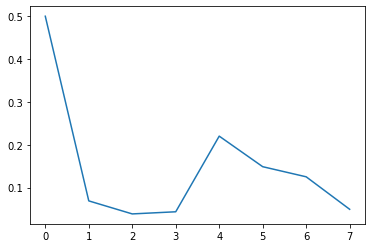

In [ ]:
from matplotlib import pyplot as plt
plt.plot([0.5, 0.06876288659793811, 0.03833333333333334, 0.043333333333333335, 0.22, 0.1486206896551724, 0.12500000000000006, 0.0491304347826087])